In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns

C:\Users\ELASR\AppData\Roaming\Python\Python39\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
league = pd.read_csv('epldata_final.csv')
league.head(15)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [3]:
league.shape
league.describe()
type(league.fpl_value)

pandas.core.series.Series

<AxesSubplot:>

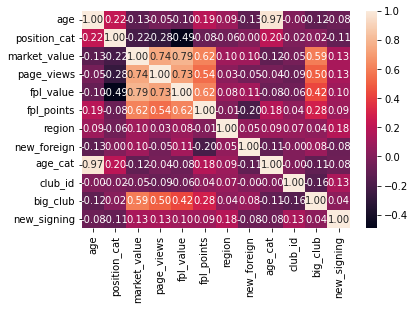

In [4]:
#Visualizing Coorelations
league_cor = league.corr()
sns.heatmap(league_cor, annot=True, fmt=".2f")

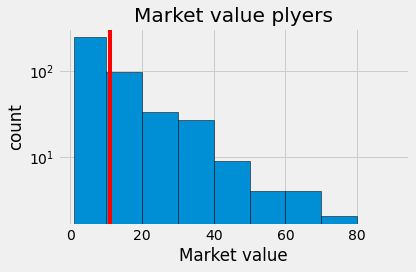

In [5]:
#Visualizing Market value distrubution
def draw_histo(data,bins):
    plt.style.use('fivethirtyeight')
    plt.hist(data,bins=bins,edgecolor="black",log=True)
    plt.axvline(data.mean(),color="red",label="MV MEAN")
    plt.ylabel("count")
    plt.xlabel("Market value")
    plt.title("Market value plyers")
    plt.tight_layout()
    plt.show()
draw_histo(league.market_value,list(filter(lambda x: x%10 == 0 or x == 1,list(range(1,100)))))

No handles with labels found to put in legend.


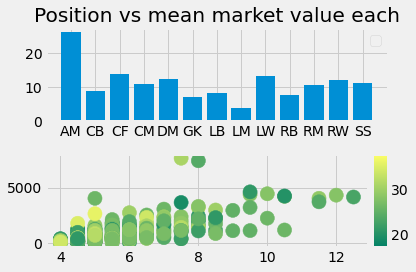

In [6]:
#Market value by position
def add_colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar
# we will plot the mean value per position in a barchart then a scatter plot
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1)

#dealing with first plot
Value_means = league.groupby('position')['market_value'].agg('mean')
ax1.bar(Value_means.index,Value_means)
ax1.legend()
ax1.set_title("Position vs mean market value each")
sp = ax2.scatter(league['fpl_value'],league['page_views'],c=league.age,cmap='summer',s=200)
add_colorbar(sp)
plt.tight_layout()
plt.rcParams['figure.figsize'] = (40,20)
plt.show()


In [7]:
#After viewing correlation we can easly say that age_cat and club_id aren't necessary for this analysis
league1 = league.drop(['age_cat','club_id'],axis='columns')
league1.head(2)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,1,0


In [8]:
league1.isnull().sum()
league1[league1.region.isnull()]
league2 = league1.dropna()

In [9]:
league2.isnull().sum()
league2.head(5)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,1,0


In [10]:
league2.club.unique()
league2.position.unique()
league2.nationality.unique()

array(['Chile', 'Germany', 'Czech Republic', 'England', 'France', 'Spain',
       'Nigeria', 'Switzerland', 'Wales', 'Brazil', 'Egypt', 'Argentina',
       'Colombia', 'Bosnia', 'Norway', 'Poland', 'Scotland', 'Congo DR',
       'Ireland', 'Netherlands', 'Australia', "Cote d'Ivoire", 'Finland',
       'Cameroon', 'Austria', 'Israel', 'Northern Ireland', 'Canada',
       'Belgium', 'Iceland', 'Serbia', 'Portugal', 'Ghana', 'South Korea',
       'Mali', 'Senegal', 'Curacao', 'Denmark', 'Slovenia',
       'Trinidad and Tobago', 'Bermuda', 'Algeria', 'Jamaica', 'Japan',
       'Tunisia', 'Croatia', 'Estonia', 'Ecuador', 'Armenia', 'Italy',
       'Sweden', 'United States', 'Morocco', 'The Gambia', 'Kenya',
       'Greece', 'Uruguay', 'Romania', 'Venezuela', 'New Zealand'],
      dtype=object)

In [11]:
#transforming the fpl_sel from a percent to a number
league2['fpl_sel_num'] = league2['fpl_sel'].apply(lambda x: float(x.split(f'%')[0])*0.01)

C:\Users\ELASR\AppData\Local\Temp/ipykernel_5924/3026600232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league2['fpl_sel_num'] = league2['fpl_sel'].apply(lambda x: float(x.split(f'%')[0])*0.01)


In [12]:
league2.fpl_sel_num #OK

0      0.171
1      0.056
2      0.059
3      0.015
4      0.007
       ...  
456    0.004
457    0.002
458    0.003
459    0.059
460    0.001
Name: fpl_sel_num, Length: 460, dtype: float64

In [13]:
positions = league2.groupby('position')['position'].agg('count')
league2

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,big_club,new_signing,fpl_sel_num
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,1,0,0.171
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,1,0,0.056
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,1,0,0.059
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,1,0,0.015
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,1,0,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,0,1,0.004
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,0,1,0.002
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,0,0,0.003
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,0,1,0.059


In [14]:
#Trying to reduce number of nationalities
nationalities = league2.groupby('nationality')['nationality'].agg('count').sort_values(ascending=True)
nat_less_than_five = nationalities[nationalities <= 5]

league2['nationality'] = league2['nationality'].apply(lambda x: 'other_nat' if x in nat_less_than_five else x)


C:\Users\ELASR\AppData\Local\Temp/ipykernel_5924/131961717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league2['nationality'] = league2['nationality'].apply(lambda x: 'other_nat' if x in nat_less_than_five else x)


# Removing Outliers

In [15]:
def remove_outliers(l):
    output = pd.DataFrame([])
    for key,subdf in l.groupby('position'):
        m = np.mean(subdf['market_value'])
        s = np.std(subdf['market_value'])
        reduced = subdf[((subdf['market_value'] > (m-s)) & (subdf['market_value'] <= (s+ m)))]
        output = pd.concat([output,reduced], ignore_index=True)
    return output

In [16]:
league3 = remove_outliers(league2)
league3.head()
league3.shape

(381, 16)

# Starting The ML MODEL

In [17]:
# Applying the one-hot encoding on 
dummies_club = pd.get_dummies(league3.club)
dummies_pos = pd.get_dummies(league3.position)
dummies_nat = pd.get_dummies(league3.nationality)
dummies_club
dummies_nat
dummies_pos

In [85]:
league4 = pd.concat([league3,dummies_club,dummies_nat.drop('other_nat',axis='columns'),dummies_pos],axis='columns')

In [86]:
league5 = league4.drop(['club','fpl_sel','name','position','nationality'],axis='columns')
league5.head(1)

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,big_club,new_signing,...,CM,DM,GK,LB,LM,LW,RB,RM,RW,SS
0,23,1,25.0,1413,7.5,144,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
X = league5.drop('market_value',axis='columns')
Y = league5.market_value

In [88]:
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)
#Bad prediction

0.5709975035548721

In [129]:
tt = X_test[:][X_test.index == 267]
tt
#  lr_clf.predict(tt)[0]

,age,position_cat,page_views,fpl_value,fpl_points,region,new_foreign,big_club,new_signing,fpl_sel_num,...,CM,DM,GK,LB,LM,LW,RB,RM,RW,SS
267,24,3,385,5.0,47,4.0,0,0,0,0.003,...,0,0,0,1,0,0,0,0,0,0


In [89]:
#Applying cross validation
cv = ShuffleSplit(n_splits=15,test_size = 0.3,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([ 6.90964932e-01,  7.14782997e-01,  6.22749438e-01,  6.29999440e-01,
        6.04175122e-01,  5.17033851e-01,  7.34568826e-01,  5.26442895e-01,
        5.26948085e-01,  4.41991649e-01, -6.25568320e+17,  5.50094486e-01,
        7.52887657e-01,  6.69644912e-01,  6.36111627e-01])

# Choosing the right Model

In [90]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_usingGridSearch(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree' : {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [91]:
find_best_model_usingGridSearch(X,Y)
# WE conclude that linear regression is the best for our analysis

,model,best_score,best_params
0,linear_regression,0.706323,{'normalize': False}
1,lasso,0.424373,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.566398,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [134]:
league6 = league5.drop(['position_cat','fpl_sel_num'],axis='columns')
X = league6.drop('market_value',axis='columns')
Y = league6.market_value
find_best_model_usingGridSearch(X,Y)
#we can say that position cat and fpl_sel_num are not significant

,model,best_score,best_params
0,linear_regression,0.709197,{'normalize': False}
1,lasso,0.424373,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.523375,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [144]:
def conv(xx):
    sortie = {}
    for i,j in zip(xx,X.columns):
        sortie[j] = [i]
    return pd.DataFrame(sortie)

In [182]:
def prepare_model():
     X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
     lr_clf = LinearRegression()
     lr_clf.fit(X_train,Y_train)
     lr_clf.score(X_test,Y_test)
     return lr_clf

def predict_market_value(age,page_views,fpl_value,fpl_points,region,new_foreign,big_club,new_signing,nat,club,pos):
    nat_index = np.where(X.columns == nat)[0][0]
    club_index = np.where(X.columns == club)[0][0]
    pos_index = np.where(X.columns == pos)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = int(age)
    x[1] = int(page_views)
    x[2] = int(fpl_value)
    x[3] = int(fpl_points)
    x[4] = region
    x[5] = new_foreign
    x[6] = big_club
    x[7] = new_signing
    if nat_index >= 0:
        x[nat_index]=1
    
    if club_index >= 0:
        x[club_index]=1
    
    if pos_index >= 0:
        x[pos_index]=1
    
    return prepare_model().predict([x])[0]

In [183]:
class prepare_data():
    def __init__(self,data) -> None:
        self.data = data
    def get_players(self):
        return self.data.name
    def get_nats(self):
        return self.data.nationality
with open('helper_class.class') as f:
     pass


In [184]:
x = predict_market_value(23,1413,7.5,144,1.0,0,0,0,'England','Everton','AM')
#age,page_views,fpl_value,fpl_points,region,new_foreign,big_club,new_signing,nat,club,pos
#Everton,23,AM,1413,7.5,144,1.0,England,0,0,0
x

23.792011213958943

# Exporting data and model

In [185]:
import pickle
with open('predict_market_value.pickle','wb') as f:
    pickle.dump(prepare_model(),f)

In [186]:
import json 

columns = {
    'data_cols' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))